In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
########################## Ban/Pick times ###########################

In [ ]:
'''
To get the number of time that the champion/item picked/banned : we need to map every champion/item in the match to
1 , then reduce by key to get the count. The output is a tuple that contain the champion/item ad=nd the number of 
time it was picked/banned
'''

In [36]:
Ban_times = pd.read_csv("ch_ban_times.csv")
Ban_times = Ban_times.dropna()
Ban_times.rename(columns = {'_1':'Champion' , '_2':'Ban Times'}, inplace = True)

In [41]:
Pick_times = pd.read_csv("ch_pick_times.csv")
Pick_times = Pick_times.dropna()
Pick_times.rename(columns = {'_1':'Champion' , '_2':'Pick Times'}, inplace = True)

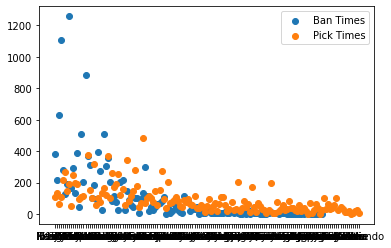

In [73]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(Ban_times['Champion'] , Ban_times['Ban Times']  , label='Ban Times' )
ax1.scatter(Pick_times['Champion'] , Pick_times['Pick Times'] , label='Pick Times' )
plt.legend(loc='upper right');
plt.show()

In [74]:
Item_picking_times = pd.read_csv("Item_picking_times.csv")
Item_picking_times = Item_picking_times.dropna()
Item_picking_times.rename(columns = {'_1':'Item' , '_2':'Pick Times'}, inplace = True)

<AxesSubplot:xlabel='Item', ylabel='Pick Times'>

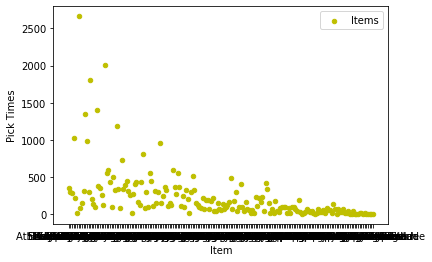

In [78]:
Item_picking_times.plot(kind="scatter", x="Item", y="Pick Times" , label = "Items" , c = 'y')


In [ ]:
######################### Win rate ####################

In [ ]:
'''
Win rate =  win times / pick time
To get the win rate for champion/item : we need to filter the winning teams from every match , then map it 
to 1 and reduce to get the number of times that champion/item won. Finally , applying the equation of win rate in
map function.
'''

In [58]:
Champions_winrate = pd.read_csv("champion_win_rate.csv")
Champions_winrate = Champions_winrate.dropna()

array([[<AxesSubplot:title={'center':'win rate'}>]], dtype=object)

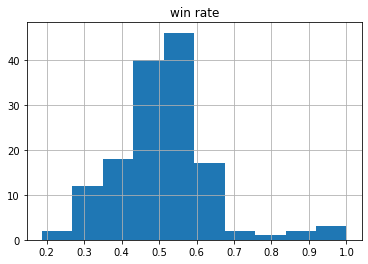

In [59]:
Champions_winrate.hist()

/home/mg/.local/lib/python3.7/site-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


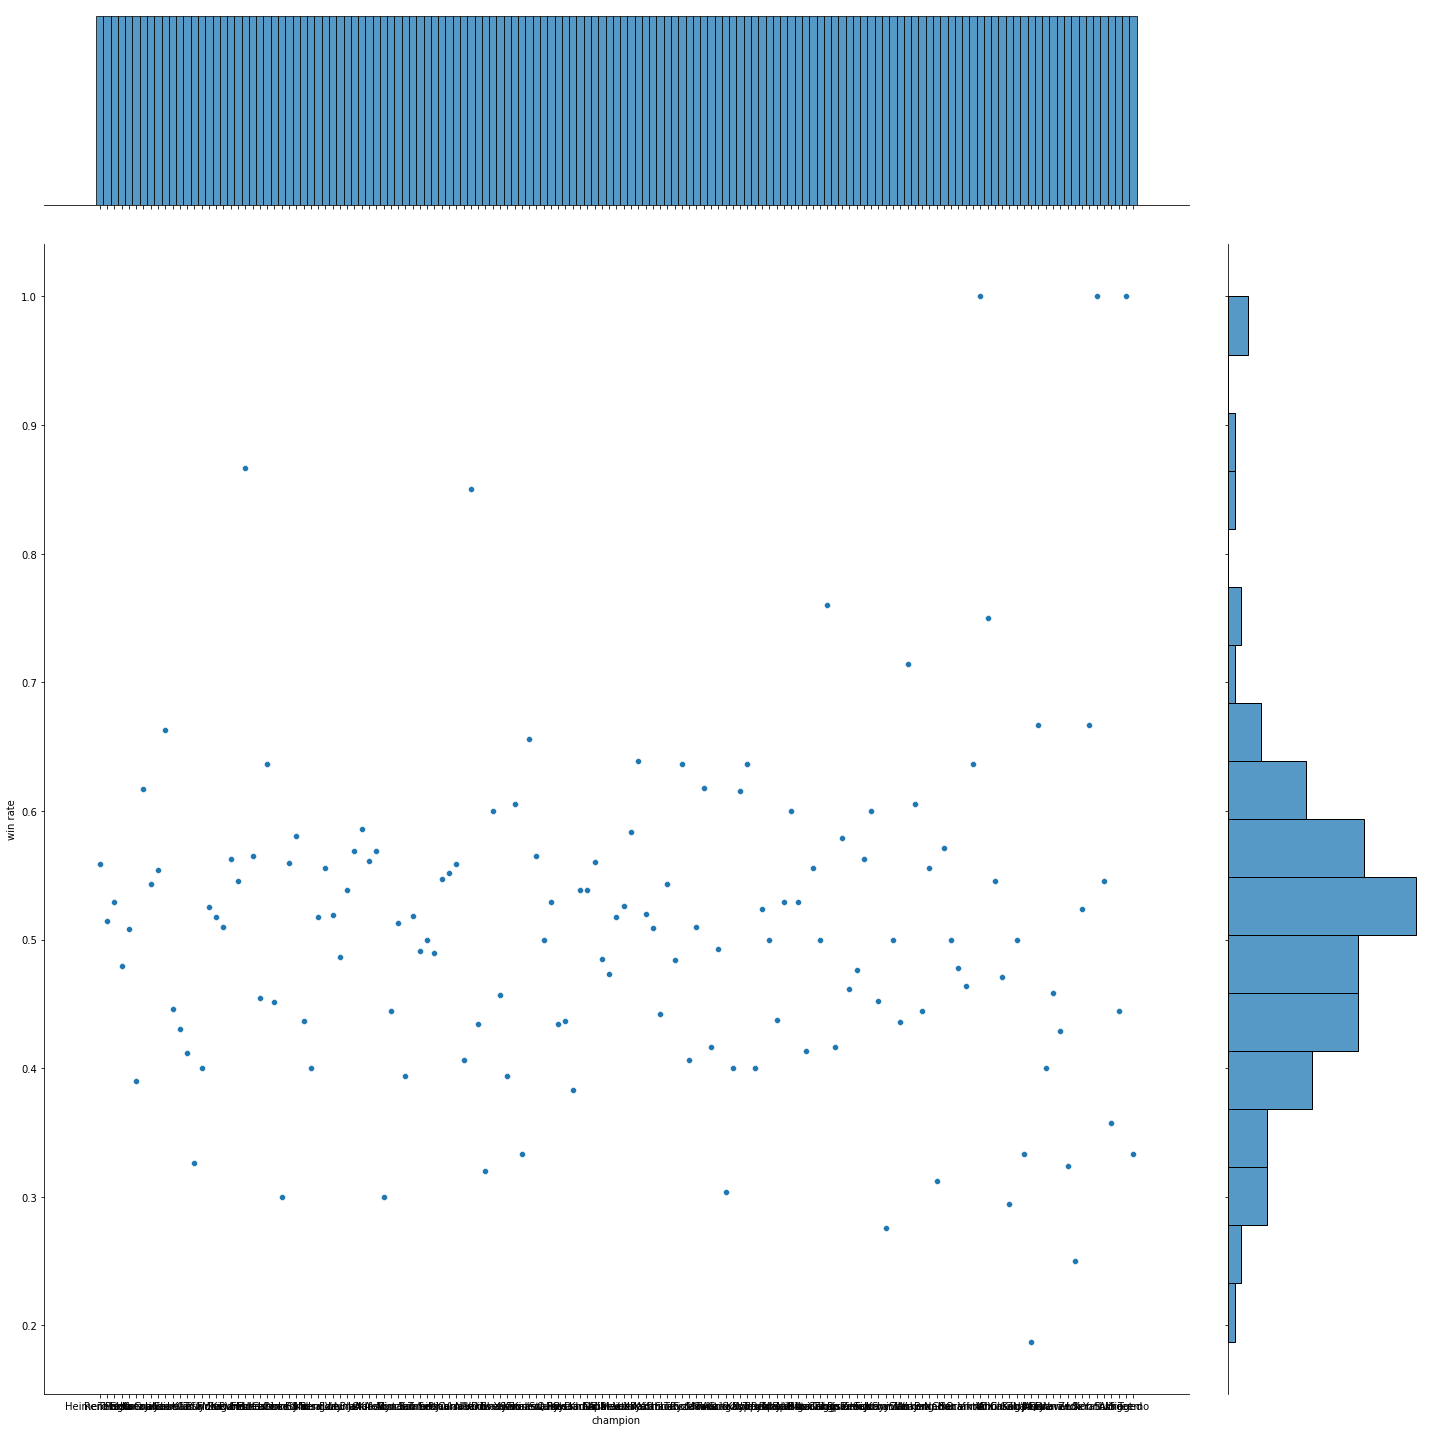

In [61]:
### 
sns.jointplot(x="champion", y="win rate", data=Champions_winrate, size=20)


In [83]:
Items_winrate = pd.read_csv("items_winning_rate.csv")
Items_winrate = Items_winrate.dropna()
Items_winrate.rename(columns = {'_1':'Item' , '_2':'Win rate'}, inplace = True)

array([[<AxesSubplot:title={'center':'Win rate'}>]], dtype=object)

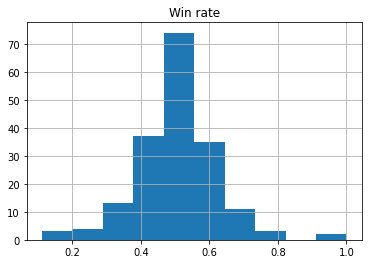

In [84]:
Items_winrate.hist()

/home/mg/.local/lib/python3.7/site-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


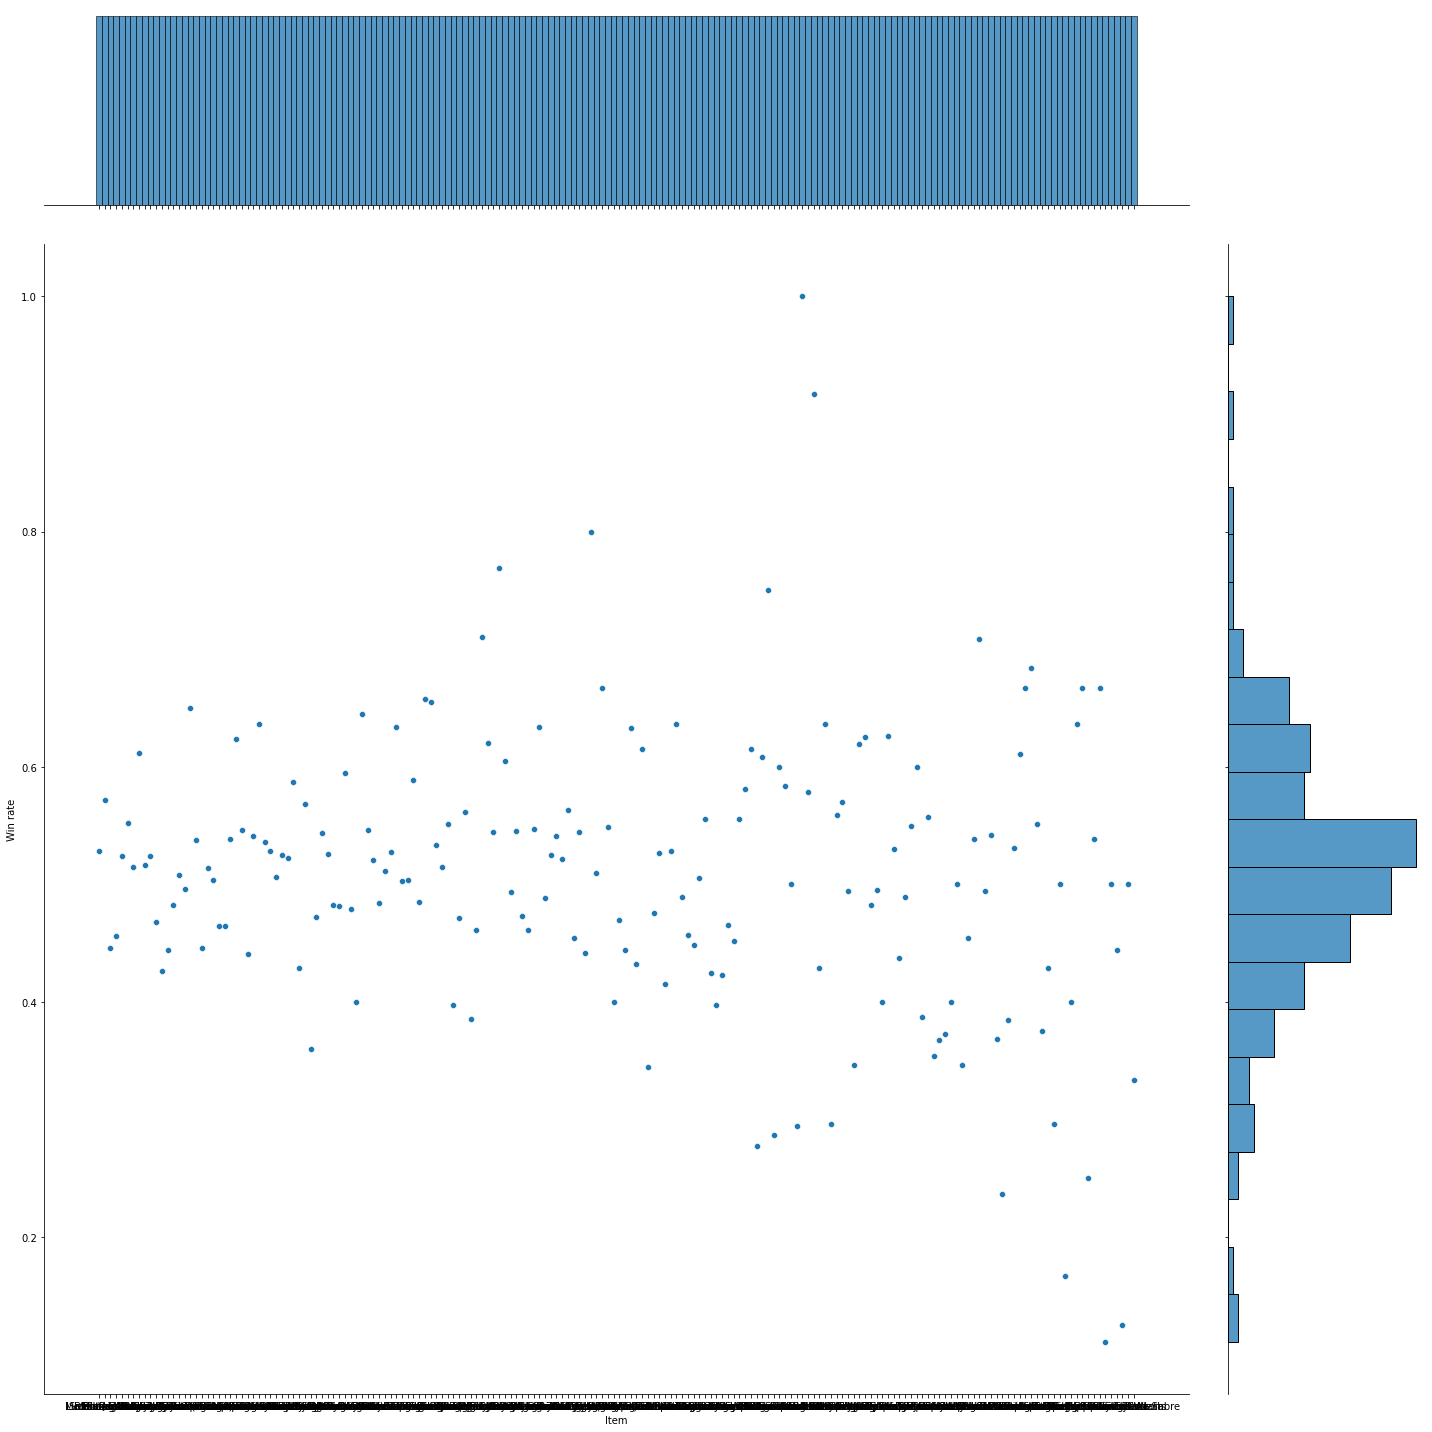

In [85]:
sns.jointplot(x="Item", y="Win rate", data=Items_winrate, size=20)


In [ ]:
############################ Synergies & Duos #################

In [ ]:
'''
In synergies part we needed to make some preprocessing to apply map/flatMap funtion over it.
1- we need to pick all the items with champion and tag(class) in one table , 
that also contain game and team information for uniqeness
2-stack all the items in the same game for the same champion in on one row
3- map the champion to tags
4- emurate every item to every tag
5- applying a simple map in the final table to map every single synergy(champion-item or class-item) to 1
6- reduce over champion-item / class-item synergy to count the number of times that this synergy happened.
'''

In [87]:
Champion_item = pd.read_csv("Synergies_winning_rate.csv")
Champion_item.rename(columns = {'_1':'Champion' , '_2':'Item' , '_3':'Win rate'}, inplace = True)

In [92]:
col = np.unique(np.array(Champion_item["Champion"]))
row = np.unique(np.array(Champion_item["Item"]).astype(str))
val = np.array(Champion_item["Win rate"])

In [121]:
Champion_item_matrix = pd.DataFrame(columns = row, index=col)
for i in range(3680):
    try:
        Champion_item_matrix.at[Champion_item["Champion"][i] , Champion_item["Item"][i] ] = Champion_item["Win rate"][i]
    except:
        pass

Champion_item_matrix = Champion_item_matrix.fillna(0)
Champion_item_matrix[0:3]

,'Your Cut',Abyssal Mask,Adaptive Helm,Aegis of the Legion,Aether Wisp,Amplifying Tome,Archangel's Staff,Ardent Censer,Athene's Unholy Grail,B. F. Sword,...,Warding Totem (Trinket),Warmog's Armor,Wit's End,Youmuu's Ghostblade,Zeal,Zeke's Convergence,Zhonya's Hourglass,Zhonya's Paradox,nan,NaN
Aatrox,0.0,0.0,0.0,0.333333,0.0,0.000000,0.0,0.0,0.0,0.5,...,0.517241,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0,0.562500
Ahri,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.666667,0.0,0.0,0.0,0.0,0.0,0.50000,0.0,0,0.000000
Akali,0.0,0.0,0.0,0.000000,0.0,0.333333,0.0,0.0,0.0,0.0,...,0.638298,0.0,0.0,0.0,0.0,0.0,0.53125,0.0,0,0.541667


In [107]:
Champion_item_matrix.describe()

,'Your Cut',Abyssal Mask,Adaptive Helm,Aegis of the Legion,Aether Wisp,Amplifying Tome,Archangel's Staff,Ardent Censer,Athene's Unholy Grail,B. F. Sword,...,Warding Totem (Trinket),Warmog's Armor,Wit's End,Youmuu's Ghostblade,Zeal,Zeke's Convergence,Zhonya's Hourglass,Zhonya's Paradox,nan,NaN
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000
mean,0.006993,0.050749,0.065102,0.187530,0.071062,0.145259,0.015769,0.042749,0.049212,0.155351,...,0.331468,0.056494,0.058090,0.072651,0.077351,0.082052,0.201436,0.038462,0.0,0.436198
std,0.083624,0.214384,0.234104,0.347967,0.234709,0.272744,0.111169,0.151629,0.173623,0.304658,...,0.273980,0.218615,0.223277,0.213353,0.243391,0.233928,0.322764,0.188367,0.0,0.223270
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.303846
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.388889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.428571
75%,0.000000,0.000000,0.000000,0.250000,0.000000,0.226190,0.000000,0.000000,0.000000,0.000000,...,0.519490,0.000000,0.000000,0.000000,0.000000,0.000000,0.428571,0.000000,0.0,0.561250
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.750000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


<AxesSubplot:>

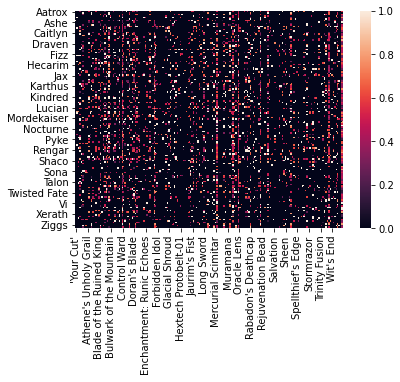

In [124]:
sns.heatmap(Champion_item_matrix)


<AxesSubplot:>

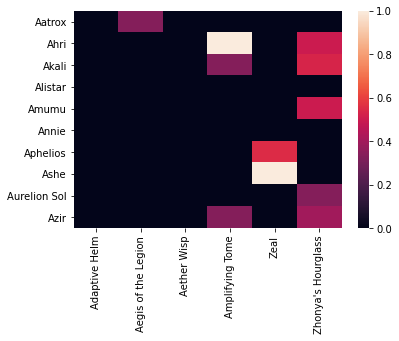

In [128]:
sns.heatmap(Champion_item_matrix[['Adaptive Helm','Aegis of the Legion', 'Aether Wisp' , 'Amplifying Tome' , 'Zeal' , "Zhonya's Hourglass"]][0:10])

In [ ]:
''' Chmapion - champion synergy
In synergies part we needed to make some preprocessing to apply map/flatMap funtion over it.
1- we need to pick all the champions in one table , that also contain game and team information for uniqeness
2-self join champion per team per game with his team mates to make a table of signle synergies
3- applying a simple map in the final table to map every single synergy to 1
4- reduce over champion-champion synergy to count the number of times that this synergy happened.
'''

In [131]:
Champion_synergies = pd.read_csv("champion_synergies.csv")
Champion_synergies.rename(columns = {'_1':'Champion1' , '_2':'Champion2' , '_3':'Times'}, inplace = True)

In [137]:
col = np.unique(np.array(Champion_synergies["Champion1"]).astype(str))
row = np.unique(np.array(Champion_synergies["Champion2"]).astype(str))
val = np.array(Champion_synergies["Times"])

In [143]:
Champions_matrix = pd.DataFrame(columns = row, index=col)
for i in range(3680):
    try:
        Champions_matrix.at[Champion_synergies["Champion1"][i] , Champion_synergies["Champion2"][i] ] = Champion_synergies["Times"][i]
    except:
        pass

Champions_matrix = Champions_matrix.fillna(0)
Champions_matrix

,Aatrox,Ahri,Akali,Alistar,Amumu,Anivia,Annie,Aphelios,Ashe,Aurelion Sol,...,Xin Zhao,Yasuo,Yorick,Yuumi,Zac,Zed,Ziggs,Zilean,Zoe,Zyra
Aatrox,0,0,0,9,0,0,0,28,4,0,...,0,0,0,7,0,0,10,0,7,0
Ahri,0,0,0,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
Akali,0,0,0,5,0,0,0,19,0,4,...,0,4,0,0,0,0,0,0,0,0
Alistar,9,0,5,0,0,0,0,12,0,4,...,0,4,0,0,0,0,0,0,5,0
Amumu,0,0,0,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zed,0,0,0,0,0,0,0,6,0,0,...,0,4,0,0,0,0,9,0,0,0
Ziggs,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,9,0,0,0,0
Zilean,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zoe,7,0,0,5,0,0,0,12,0,0,...,0,6,0,9,4,0,0,0,0,0


In [142]:
Champions_matrix.describe()

,Aatrox,Ahri,Akali,Alistar,Amumu,Anivia,Annie,Aphelios,Ashe,Aurelion Sol,...,Xin Zhao,Yasuo,Yorick,Yuumi,Zac,Zed,Ziggs,Zilean,Zoe,Zyra
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.0,147.000000,147.000000,147.000000,...,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.0
mean,2.108844,0.115646,2.122449,0.544218,0.129252,0.108844,0.0,6.408163,0.258503,0.496599,...,0.258503,3.612245,0.108844,2.721088,1.027211,0.965986,0.789116,0.265306,2.095238,0.0
std,4.549769,0.697520,5.420532,1.913296,0.787506,0.653015,0.0,9.378462,1.104712,1.721636,...,1.020935,6.275031,0.653015,5.122850,2.767090,2.439445,2.177819,1.154660,4.407859,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,9.000000,0.000000,0.000000,...,0.000000,5.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.0
max,28.000000,5.000000,33.000000,12.000000,6.000000,4.000000,0.0,52.000000,6.000000,13.000000,...,5.000000,32.000000,4.000000,38.000000,17.000000,14.000000,10.000000,8.000000,26.000000,0.0


<AxesSubplot:>

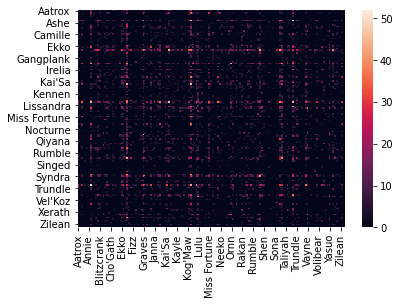

In [141]:
sns.heatmap(Champions_matrix)


<AxesSubplot:>

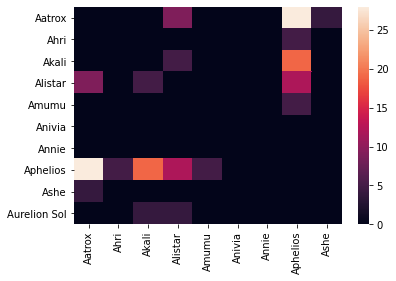

In [146]:
sns.heatmap(Champions_matrix[["Aatrox" ,"Ahri" ,"Akali"  ,"Alistar" ,"Amumu" , "Anivia" ,"Annie" , "Aphelios" ,"Ashe"]][0:10])

In [ ]:
############################## Item suggestion ###################

In [147]:
'''
I would like to propose two procedure to handle the Item suggestion:
The first :
1- Make five sets of items , each set belong to specific cateogry of items (starter , basic, ..etc)
2- Make champion-item win rate
3- Filter the win rate table for every subset and assign the item  with max win rate to the champion
4- join all the output tables from the every subset to make the full suggestion

the seconed :
1- Make champion-item win rate
2- Groub by every champion and order the chmpion-item according to winrate
3- assign ranking for every champion item (by uning rank() function)
4- give the user the ability to choose its items according to ranks
'''

'\nI would like to propose two procedure to handle the Item suggestion:\nThe first :\n1- Make five sets of items , each set belong to specific cateogry of items (starter , basic, ..etc)\n2- Make champion-item win rate\n3- Filter the win rate table for every subset and assign the item  with max win rate to the champion\n4- join all the output tables from the every subset to make the full suggestion\n\nthe seconed :\n1- Make champion-item win rate\n2- Groub by every champion and order the chmpion-item according to winrate\n3- assign ranking for every champion item (by uning rank() function)\n4- give the user the ability to choose its items according to ranks\n'

In [7]:
Item_suggestion = pd.read_csv("item.csv")


In [8]:
Item_suggestion

,Champion,Boots,Basic,Epic,Mythic and Legendary
0,Gangplank,Boots of Swiftness,Doran's Blade,Executioner's Calling,Lord Dominik's Regards
1,Kalista,Berserker's Greaves,Doran's Blade,Executioner's Calling,Might of the Ruined King
2,Bard,Mercury's Treads,Doran's Ring,Zeal,Dark Seal
3,Pantheon,Mercury's Treads,Doran's Blade,Bramble Vest,Maw of Malmortius
4,Poppy,Mercury's Treads,Doran's Shield,Bramble Vest,Knight's Vow
...,...,...,...,...,...
60,Renekton,Mercury's Treads,Doran's Shield,Bramble Vest,Quicksilver Sash
61,Riven,Mercury's Treads,Doran's Blade,Bramble Vest,Jaurim's Fist
62,Tristana,Berserker's Greaves,Doran's Blade,Executioner's Calling,Health Potion
63,Morgana,Boots of Swiftness,Doran's Ring,Crystalline Bracer,Aegis of the Legion


In [10]:
Item_suggestion.describe()

,Champion,Boots,Basic,Epic,Mythic and Legendary
count,65,65,65,65,65
unique,65,5,4,12,44
top,Lucian,Mercury's Treads,Doran's Shield,Executioner's Calling,Death's Dance
freq,1,27,23,15,4
